<a href="https://colab.research.google.com/github/shilpapanniru/ShilpaReddyDS/blob/main/Revenue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**REVENUE PREDICTION PROJECT**

**import the basic libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**load the dataset**

In [ ]:
df = pd.read_csv('revenue_prediction.csv')

In [ ]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
# eda

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


**examining missing value in a dataset**

In [ ]:
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


**drop unecessary columns**

In [ ]:
df = df.drop(columns =['Id','Name'], errors ='ignore')

In [ ]:
df.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715


In [ ]:
# what is average revenue generated by restaurents??

df['Revenue'].mean()

np.float64(4395160.9)

In [ ]:
#  which category generates the highest average revenue ??

df.groupby('Category')['Revenue'].mean().sort_values(ascending = False)

,Revenue
Category,
Asian,7.513524e+06
Healthy,5.966193e+06
Bakery Cafe,5.749800e+06
BBQ,5.542483e+06
Varied Menu,5.509978e+06
Burger,5.506968e+06
Seafood,4.491006e+06
Asian/Noodle,4.428070e+06
Pizza,4.274444e+06


In [ ]:
# do franchise restaurent earn more revenue than non -franchise resturant ??

df.groupby('Franchise')['Revenue'].mean()

,Revenue
Franchise,
No,4.252138e+06
Yes,4.512180e+06


In [ ]:
#  what are the top 5 restuarent by revenue ??

df.nlargest(5 , 'Revenue')

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
16,Yes,Burger,Bengaluru,123,10.8,19696939
75,No,Bakery Cafe,Bengaluru,126,13.0,16549064
49,No,Varied Menu,Gurugram,117,8.5,8630682
24,Yes,BBQ,Mumbai,110,8.8,7904084
47,No,Family Casual,Bengaluru,85,7.7,7865428


In [ ]:
# data cleaning :

# null
# duplicate

# outliers


In [ ]:
cols =list(df.columns)

cols

['Franchise', 'Category', 'City', 'No_Of_Item', 'Order_Placed', 'Revenue']

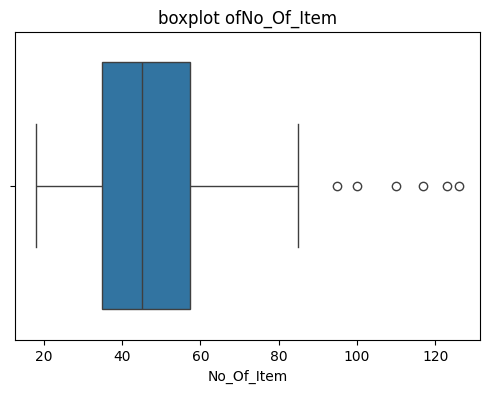

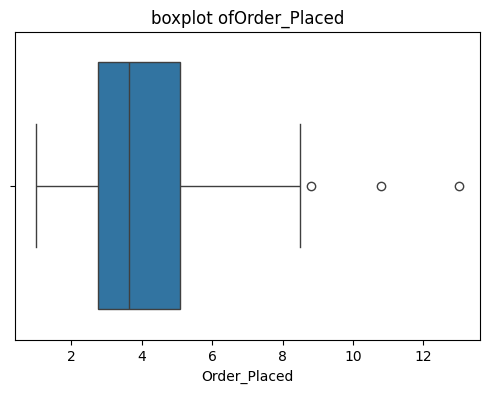

In [ ]:
for i in cols:
  if df[i].dtypes != 'object' and i != 'Revenue':
    plt.figure(figsize =(6,4))
    sns.boxplot(x = df[i])
    plt.title("boxplot of" + i)
    plt.show()


In [ ]:
df

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,Yes,Mexican,Bengaluru,55,5.5,5953753
1,No,Varied Menu,Gurugram,72,6.8,7223131
2,Yes,Chicken,Pune,25,1.9,2555379
3,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...
95,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,Yes,Sports Bar,Pune,25,2.1,2344689


# **Data Preprocessing**

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df['Franchise'] = label_encoder.fit_transform(df['Franchise'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['City'] = label_encoder.fit_transform(df['City'])

In [ ]:
df.head()

,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,1,12,0,55,5.5,5953753
1,0,19,1,72,6.8,7223131
2,1,5,4,25,1.9,2555379
3,1,11,2,18,2.5,2175511
4,1,13,3,48,4.2,4816715


In [ ]:
# splitting  feature and target
x = df.drop(columns =['Revenue'])
y = df['Revenue']

In [ ]:
x

,Franchise,Category,City,No_Of_Item,Order_Placed
0,1,12,0,55,5.5
1,0,19,1,72,6.8
2,1,5,4,25,1.9
3,1,11,2,18,2.5
4,1,13,3,48,4.2
...,...,...,...,...,...
95,0,11,0,19,1.1
96,1,19,0,75,6.3
97,1,19,1,77,6.2
98,1,17,4,25,2.1


In [ ]:
y

,Revenue
0,5953753
1,7223131
2,2555379
3,2175511
4,4816715
...,...
95,1270499
96,6412623
97,6694797
98,2344689


#**scaling numerical features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
X_scaled

array([[ 9.04534034e-01,  9.20828617e-02, -1.00668904e+00,
         2.65962381e-01,  6.91510424e-01],
       [-1.10554160e+00,  1.33165985e+00, -3.40007556e-01,
         1.02970571e+00,  1.32726965e+00],
       [ 9.04534034e-01, -1.14749412e+00,  1.66003689e+00,
        -1.08181996e+00, -1.06905360e+00],
       [ 9.04534034e-01, -8.49995647e-02,  3.26673926e-01,
        -1.39630250e+00, -7.75626260e-01],
       [ 9.04534034e-01,  2.69165288e-01,  9.93355408e-01,
        -4.85201641e-02,  5.57511940e-02],
       [ 9.04534034e-01,  6.23330141e-01,  9.93355408e-01,
         3.10888459e-01,  3.98083087e-01],
       [ 9.04534034e-01,  1.15457742e+00,  9.93355408e-01,
         4.00740615e-01,  4.46987643e-01],
       [ 9.04534034e-01,  2.69165288e-01,  3.26673926e-01,
        -3.59408623e-03,  1.04655750e-01],
       [ 9.04534034e-01,  9.20828617e-02,  3.26673926e-01,
         4.45666693e-01,  3.49178531e-01],
       [ 9.04534034e-01,  1.15457742e+00,  1.66003689e+00,
         1.20941002e+00

In [ ]:
# split the dataset into training and testing set

from sklearn.model_selection import  train_test_split

In [ ]:
x_train ,x_test, y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2,random_state = 42)

In [ ]:
# train and predict the result by applying different models



In [ ]:
#1 linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(x_test)

In [ ]:
y_pred_lr

array([6666479.57324263, 5639644.54872309, 3805536.39463166,
       4193324.18078208, 4343130.14047884, 3771286.28284555,
       3975231.17369166, 3538465.19057696, 4008270.62952064,
       6564461.36756485, 5475587.89962776, 3049610.70004873,
       2810473.9006414 , 2279966.85189423, 3582880.67553956,
       4520150.55828419, 5132586.00030909, 1439624.56657968,
       1771028.10021912, 2139029.64016056])

In [ ]:
# evaluation of model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
print(f"Linear Regression - \n MAE : {mae_lr :.2f} \n mse_lr {mse_lr :.2f} \n r2_score {r2_lr :.2f}")

Linear Regression - 
 MAE : 364176.65 
 mse_lr 199243202309.41 
 r2_score 0.86


In [ ]:
# 2.  Decision  Tree regression

from sklearn.tree  import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)

In [ ]:
dt.fit(x_train , y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [ ]:
print(f"Decision Tree - \n MAE : {mae_dt :.2f} \n mse_lr {mse_dt :.2f} \n r2_score {r2_dt :.2f}")

Decision Tree - 
 MAE : 673460.30 
 mse_lr 860388472880.80 
 r2_score 0.41


In [ ]:
#3 . Random forest regression

from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf= mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Random Forest regrssor - \n MAE : {mae_rf :.2f} \n mse_lr {mse_rf :.2f} \n r2_score {r2_rf :.2f}")

Random Forest regrssor - 
 MAE : 422225.17 
 mse_lr 290242839354.89 
 r2_score 0.80


In [ ]:
# support vector regressor

from sklearn.svm import SVR

svr = SVR(kernel ='rbf')


In [ ]:
svr.fit(x_train, y_train)

SVR()

In [ ]:
y_pred_svr= svr.predict(x_test)


In [ ]:
y_pred_svr

array([3911408.31622165, 3911410.87119924, 3911402.415036  ,
       3911403.48581658, 3911408.02147884, 3911401.01389579,
       3911403.77971005, 3911402.24189626, 3911399.5594956 ,
       3911411.30250489, 3911410.51691203, 3911403.05404225,
       3911400.8668076 , 3911398.17334502, 3911399.09661932,
       3911405.33403615, 3911405.93478347, 3911401.11263788,
       3911397.95889017, 3911398.15051172])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr= mean_squared_error(y_test, y_pred_svr)
r2_svr= r2_score(y_test, y_pred_svr)

In [ ]:
print(f"support  vector regressr - \n MAE : {mae_svr :.2f} \n mse_lr {mse_svr :.2f} \n r2_score {r2_svr :.2f}")



support  vector regressr - 
 MAE : 982910.96 
 mse_lr 1464290155782.49 
 r2_score -0.00


In [ ]:
# visualization

models_scores  ={
    "linear regression": {'MAE': mae_lr, "MSE" :mse_lr , "r2_score":r2_lr},
    "Decision Tree" : {'MAE': mae_dt, "MSE" :mse_dt , "r2_score":r2_dt},
    "Random_Forest" : {'MAE': mae_rf, "MSE" :mse_rf , "r2_score":r2_rf}
}


In [ ]:
score_df = pd.DataFrame(models_scores).T

In [ ]:
score_df

,MAE,MSE,r2_score
linear regression,364176.652816,1.992432e+11,0.863929
Decision Tree,673460.300000,8.603885e+11,0.412406
Random_Forest,422225.170500,2.902428e+11,0.801781


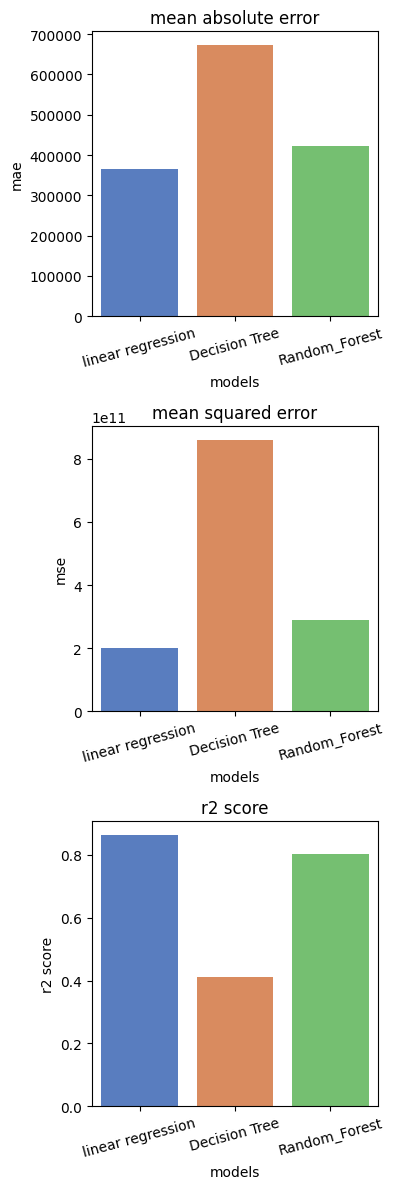

In [ ]:
plt.figure(figsize=(4, 12))
# plot for mae

plt.subplot(3,1,1)
sns.barplot(x= score_df.index, y =score_df['MAE'], hue = score_df.index, palette='muted' , legend = False)
plt.title('mean absolute error')
plt.ylabel('mae')
plt.xlabel('models')
plt.xticks(rotation = 15)

plt.subplot(3,1,2)
sns.barplot(x= score_df.index, y =score_df['MSE'], hue = score_df.index, palette='muted' , legend = False)
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('models')
plt.xticks(rotation = 15)

plt.subplot(3,1,3)
sns.barplot(x= score_df.index, y =score_df['r2_score'], hue = score_df.index, palette='muted' , legend = False)
plt.title('r2 score')
plt.ylabel('r2 score')
plt.xlabel('models')
plt.xticks(rotation = 15)
plt.tight_layout()

In [ ]:
# model with lowest mae

best_mae_model = score_df['MAE'].idxmin()

print(f" best model based on MAE {best_mae_model} (MAE {score_df['MAE'][best_mae_model] :.2f})")

 best model based on MAE linear regression (MAE 364176.65)


In [ ]:
# model with lowest mse

best_mse_model = score_df['MSE'].idxmin()

print(f" best model based on MSE {best_mse_model} (MAE {score_df['MSE'][best_mse_model] :.2f})")

 best model based on MSE linear regression (MAE 199243202309.41)


In [ ]:
# model with highest r2

best_r2_score = score_df['r2_score'].idxmax()

print(f" best model based on r2_score {best_r2_score} (MAE {score_df['r2_score'][best_r2_score] :.2f})")

 best model based on r2_score linear regression (MAE 0.86)


In [ ]:
# overall best model

print(f"overal best model : {best_r2_score}")

overal best model : linear regression
